<a href="https://colab.research.google.com/github/john-s-butler-dit/Basic-Introduction-to-Python/blob/master/W2T2%20Simulate%20Spiking%20TrialsSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulate Spiking Trials, Week 2 Tutorial 2

In this notebook we will illustrate simple spike train analysis for repeated trials.

### Libraries

In [1]:
# LIBRARY

import numpy as np # vector manipulation
from scipy.stats import norm # Psychometric Function
from scipy.stats import poisson

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

## Multiple Trials

To simulate a single 1000ms trial we generate a matrix of 1000 time 100 trials random numbers between 0 and 1.

In [2]:
Samples=1000 # 1000 ms
Trials=100 # 100 trials
Random_numbers=np.random.uniform(0,1,[Samples,Trials]) # 

The neuron we wish to simulate spikes at 30Hz. We assume that neurons spike in a Poisson fashion. 
We use the function __poisson.pmf__ from the __scipy.stats__ library to calculate the probability the neuron will fire.

In [3]:
Spike_Rate=30
Spike_Probability_Threshold=poisson.pmf(1, Spike_Rate/1000)

## Spikes
A neuron will only fire if the probability is below the threshold.
We set the neuron to have 0 spikes at all 1000 time points and 100 trials.

In [4]:
Spikes=np.zeros((1000,100))

Then check the threshold, and if it is less than the threshold the value is set to 1.

In [5]:
Spikes[Random_numbers<Spike_Probability_Threshold]=1

## Raster Plot
The raster plot shows the spike trains for each trial.

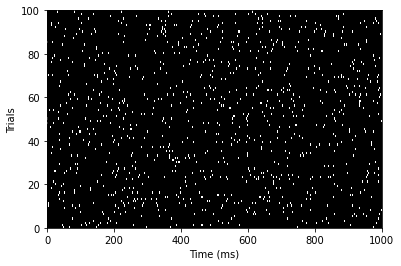

In [6]:
fig = plt.figure(figsize=(6,4)) # This setups the size of the figure
plt.pcolor(Spikes.transpose(),cmap='gray')
plt.xlabel('Time (ms)')
plt.ylabel('Trials')
plt.show() # This plots the figure

## Spikes per Trial
To calculate the number of spikes per trial like before we just sum up the number of spikes. But do note we have to say which dimension we want to sum, 0 is the time dimension and 1 is the trial dimension.
The plot below is a historgram of Spikes per trial.

In [16]:
print(Spikes.sum()) # This counts all the spikes for all the trials
print(Spikes.sum(0)) # Per trial 100 answers
print(Spikes.sum(1)) # Per milisecond: 1000 answers

2929.0
[30. 30. 25. 26. 24. 24. 24. 36. 35. 27. 24. 24. 25. 28. 31. 31. 35. 26.
 35. 36. 22. 38. 38. 30. 20. 29. 45. 30. 18. 24. 31. 22. 27. 34. 21. 27.
 27. 29. 34. 35. 31. 27. 24. 31. 31. 22. 29. 31. 28. 28. 28. 27. 26. 31.
 30. 26. 29. 31. 33. 37. 35. 37. 29. 24. 30. 38. 21. 31. 21. 38. 31. 29.
 39. 28. 29. 34. 25. 36. 27. 35. 34. 34. 25. 29. 14. 24. 30. 34. 34. 20.
 36. 25. 24. 28. 27. 28. 26. 25. 44. 34.]
[ 5.  2.  2.  4.  3.  3.  8.  5.  1.  2.  5.  2.  2.  4.  5.  3.  2.  2.
  2.  0.  2.  2.  4.  2.  4.  5.  0.  7.  4.  1.  3.  4.  3.  1.  1.  3.
  3.  5.  0.  5.  3.  4.  2.  1.  2.  2.  2.  4.  2.  3.  2.  3.  7.  1.
  3.  2.  3.  4.  6.  7.  2.  2.  4.  3.  2.  3.  6.  4.  2.  4.  4.  3.
  2.  6.  3.  3.  3.  6.  4.  2.  1.  1.  1.  1.  1.  2.  3.  5.  4.  3.
  1.  8.  4.  2.  3.  3.  3.  3.  2.  1.  4.  5.  3.  3.  1.  4.  3.  3.
  2.  0.  2. 10.  2.  0.  5.  3.  7.  4.  6.  4.  2.  1.  2.  3.  3.  1.
  2.  2.  5.  1.  5.  5.  6.  7.  3.  1.  2.  3.  2.  1.  3.  3.  4.  1.
  

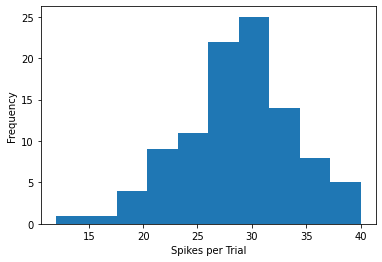

In [7]:
plt.hist(Spikes.sum(0))
plt.xlabel('Spikes per Trial')
plt.ylabel('Number of Trials')
plt.show()

## Peri-Stimulus Time Histogram (PSTH)
Another way to look at spiking is by time. Similar to above we sum the number of spikes at each time point and divide by the number or trials.

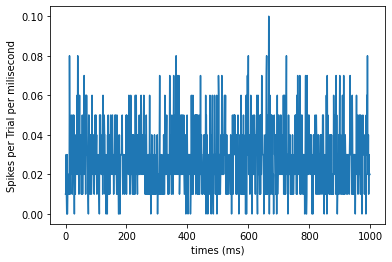

In [8]:
plt.plot(Spikes.sum(1)/Trials)
plt.ylabel('Spikes per Trial per milisecond')
plt.xlabel('times (ms)')
plt.show()

Another way of doing this is to use a moving average window to smooth the spike rate over a 100 ms.

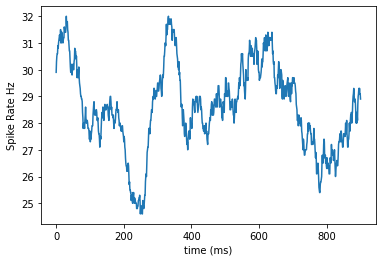

In [9]:
plt.plot(np.convolve(Spikes.sum(1), np.ones(100)/10, mode='valid'))
plt.xlabel('time (ms)')
plt.ylabel('Spike Rate Hz')
plt.show()

## Problem 1
Plot a Neuron with a spike rate of 50Hz for 1000 ms for 200 trials.


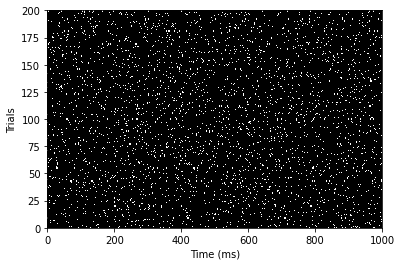

In [24]:
##############################################################################
## INSERT: Plot a Neuron with a spike rate of 50Hz for 1000 ms for 200 trials.
##############################################################################
#######################ANSWER#################################
Trials=200
Spike_Rate=50

#######################ANSWER#################################

Random_numbers=np.random.uniform(0,1,[Samples,Trials])

Spike_Probability_Threshold=poisson.pmf(1, Spike_Rate/1000)
Spikes=np.zeros([Samples,Trials])

Spikes[Random_numbers<Spike_Probability_Threshold]=1


fig = plt.figure(figsize=(6,4)) # This setups the size of the figure
plt.pcolor(Spikes.transpose(),cmap='gray')
plt.xlabel('Time (ms)')
plt.ylabel('Trials')
plt.show() # This plots the figure

## Problem 2
Plot the histogram of Spikes per Trial of a neuron with a spike rate of 50Hz for 1000 ms for 200 trials.

[55. 60. 49. 57. 32. 45. 37. 46. 40. 41. 54. 43. 52. 46. 39. 49. 42. 57.
 55. 49. 43. 44. 38. 46. 51. 51. 41. 45. 43. 40. 52. 50. 40. 49. 36. 43.
 45. 49. 50. 47. 47. 46. 46. 46. 41. 47. 51. 47. 72. 45. 42. 40. 45. 48.
 38. 51. 41. 35. 53. 50. 49. 56. 55. 49. 49. 35. 57. 61. 57. 58. 41. 52.
 37. 59. 34. 51. 41. 50. 57. 54. 37. 44. 34. 36. 48. 54. 60. 50. 57. 42.
 62. 48. 49. 42. 42. 44. 40. 50. 60. 49. 61. 39. 31. 50. 54. 51. 45. 49.
 49. 39. 42. 49. 46. 48. 48. 49. 57. 57. 32. 43. 43. 42. 47. 52. 46. 39.
 35. 49. 50. 53. 50. 54. 41. 46. 58. 38. 48. 56. 46. 62. 47. 49. 48. 40.
 38. 56. 45. 38. 36. 55. 46. 36. 50. 32. 48. 58. 45. 50. 44. 48. 61. 41.
 51. 50. 42. 36. 51. 48. 49. 44. 45. 38. 43. 53. 46. 45. 45. 56. 47. 37.
 47. 48. 37. 56. 51. 50. 49. 48. 53. 51. 52. 59. 34. 51. 33. 48. 53. 47.
 56. 48.]


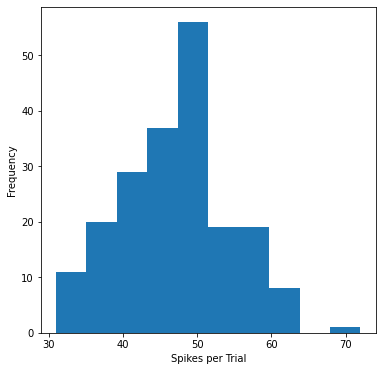

In [28]:

fig = plt.figure(figsize=(6,6))
##############################################################################
## INSERT: Plot the histogram of Spikes per Trial of a neuron with a spike rate 
## of 50Hz for 1000 ms for 200 trials.
##############################################################################
#######################ANSWER#################################
print(Spikes.sum(0))
plt.hist(Spikes.sum(0))


#######################ANSWER#################################



plt.xlabel('Spikes per Trial')
plt.ylabel('Frequency')
plt.show()

## Problem 3
Plot the Peri-Stimulus Time Histogram (PSTH) of a neuron with a spike rate of 50Hz for 1000 ms for 200 trials.

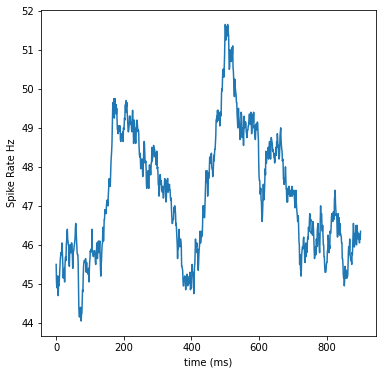

In [30]:
fig = plt.figure(figsize=(6,6))
##############################################################################
## INSERT: Plot the Peri-Stimulus Time Histogram (PSTH) of 
## a neuron with a spike rate of 50Hz for 1000 ms for 200 trials.
##############################################################################
#######################ANSWER#################################

plt.plot(np.convolve(Spikes.sum(1), np.ones(100)/20, mode='valid'))


#######################ANSWER#################################


plt.xlabel('time (ms)')
plt.ylabel('Spike Rate Hz')
plt.show()

---
# Summary

In this tutorial, we learned:

* To simulate a raster plot.
* To calculate the spikes per trial.
* To calculate the spikes per second.

